In [1]:
import numpy as np
import matplotlib.pyplot as plt

from method_scoring import test_runfit
from beter_sim import full_sim, handle_estimates, protein_estimates

In [2]:
cls = [0.005 * i for i in range(1,7)]
ufs = [30 + 5 * i for i in range(6)]

In [3]:
sim = full_sim(ufs, cls, handle_estimates, protein_estimates)
sigma_d = 0.002
sigma_f = 0.3
noisy_d = sim[0][0] + np.random.normal(0, sigma_d, sim[0][0].shape)
noisy_f = sim[0][1] + np.random.normal(0, sigma_f, sim[0][1].shape)
sim_tmp = ((noisy_d, noisy_f), sim[1])

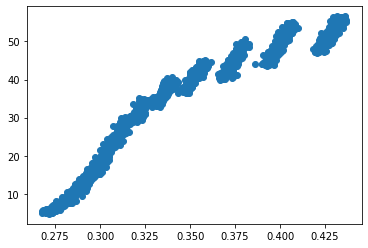

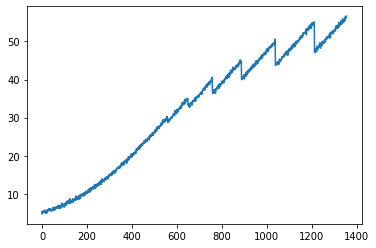

In [4]:
plt.plot(noisy_d, noisy_f, 'o')
plt.figure()
plt.plot(noisy_f)

[559, 650, 759, 888, 1039, 1213]
[568, 651, 759, 896, 1049]
{'matches': 2, 'false_pos': 3, 'misses': 4, 'off_by': [9, 8, 10], 'true': [559, 650, 759, 888, 1039, 1213], 'found': [568, 651, 759, 896, 1049], 'matched': [651, 759], 'fp': [568, 896, 1049]}


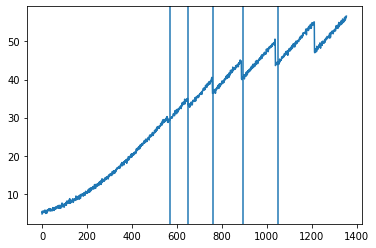

In [5]:
test = test_runfit(sim_tmp, lag_factor=3, threshold=4)
print(test)

In [6]:
from method_scoring import test_find_transitions
from method_scoring import test_spline_residuals

tft = test_find_transitions(sim_tmp)
print(tft)
tsr = test_spline_residuals(sim_tmp)
print(tsr)
# i think the true_unfolds is should be [:-1]'d

{'matches': 4, 'false_pos': 0, 'misses': 2, 'off_by': [], 'true': [559, 650, 759, 888, 1039, 1213], 'found': [758, 887, 1038, 1212], 'matched': [758, 887, 1038, 1212], 'fp': []}
{'matches': 4, 'false_pos': 0, 'misses': 2, 'off_by': [], 'true': [559, 650, 759, 888, 1039, 1213], 'found': [758, 887, 1038, 1212], 'matched': [758, 887, 1038, 1212], 'fp': []}


In [7]:
from method_scoring import bulk_test, write_results
fsigs = [round(0.1 * i,3) for i in range(1,10)]
dsigs = [round(0.001 * i, 6) for i in range(1,10)]
results = bulk_test(fsigs, dsigs, replicates = 10, skip_runfit=True)
print(results)
write_results('testresults.csv', results)

[{'force_sigma': 0.1, 'dist_sigma': 0.001, 'vanilla': {'matches': 58, 'misses': 2, 'false_pos': 0}, 'spline': {'matches': 59, 'misses': 1, 'false_pos': 0}}, {'force_sigma': 0.2, 'dist_sigma': 0.002, 'vanilla': {'matches': 49, 'misses': 11, 'false_pos': 0}, 'spline': {'matches': 52, 'misses': 8, 'false_pos': 0}}, {'force_sigma': 0.3, 'dist_sigma': 0.003, 'vanilla': {'matches': 38, 'misses': 22, 'false_pos': 0}, 'spline': {'matches': 50, 'misses': 10, 'false_pos': 1}}, {'force_sigma': 0.4, 'dist_sigma': 0.004, 'vanilla': {'matches': 33, 'misses': 27, 'false_pos': 0}, 'spline': {'matches': 44, 'misses': 16, 'false_pos': 1}}, {'force_sigma': 0.5, 'dist_sigma': 0.005, 'vanilla': {'matches': 25, 'misses': 35, 'false_pos': 0}, 'spline': {'matches': 41, 'misses': 19, 'false_pos': 3}}, {'force_sigma': 0.6, 'dist_sigma': 0.006, 'vanilla': {'matches': 17, 'misses': 43, 'false_pos': 0}, 'spline': {'matches': 43, 'misses': 17, 'false_pos': 6}}, {'force_sigma': 0.7, 'dist_sigma': 0.007, 'vanilla': {

KeyError: 'runfit'

In [8]:
from method_scoring import write_summary
write_summary('summary.csv', results)

In [ ]:
def noise_sim(sim, sigma_f, sigma_d):
    noisy_d = sim[0][0] + np.random.normal(0, sigma_d, sim[0][0].shape)
    noisy_f = sim[0][1] + np.random.normal(0, sigma_f, sim[0][1].shape)
    return ((noisy_d, noisy_f), sim[1])

def noisy_sim(cls, ufs, sigma_f, sigma_d):
    sim = full_sim(ufs, cls, handle_estimates, protein_estimates)
    noisy_d = sim[0][0] + np.random.normal(0, sigma_d, sim[0][0].shape)
    noisy_f = sim[0][1] + np.random.normal(0, sigma_f, sim[0][1].shape)
    return ((noisy_d, noisy_f), sim[1])

In [ ]:
sigmas = [0.1, 0.3, 0.5, 0.7, 0.9]
#newsim = full_sim(ufs, cls, handle_estimates, protein_estimates)
#sims = [noise_sim(newsim, SF, sigma_d) for SF in sigmas]
#plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
#plt.rc('font',size=16)
for sigma, sim in zip(sigmas, sims):
    plt.figure(figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')
    plt.rc('font',size=16)
    plt.plot(sim[0][1], 'o', label='Force time series')
    plt.xlabel('Time (N measurements)',size=16)
    plt.ylabel('Force (pN)',size=16)
    sfrt = test_spline_residuals(sim)
    print(sfrt)
    first_match = True
    first_fp = True
    score = (sfrt['matches']
             - sfrt['false_pos']) \
            / (sfrt['matches']
               + sfrt['misses'])
    score = round(score, 2)

    for found in sfrt['matched']:
        if first_match:
            plt.axvline(found, linestyle='--', color='tab:green', linewidth=2, label='Match')
            first_match = False
        else:
            plt.axvline(found, linestyle='--', color='tab:green', linewidth=2)

    for found in sfrt['fp']:
        if first_fp:
            plt.axvline(found, linestyle='--', color='tab:red', linewidth=2, label='False positive')
            first_fp = False
        else:
            plt.axvline(found, linestyle='--', color='tab:red', linewidth=2)
    plt.legend(fontsize=14)
    plt.title(f'Noise STD {sigma} - Score {score}')

In [ ]:
print(sim, len(sim[0][1]))

In [ ]:
fsigs_p = np.linspace(0.1,0.9, 500)
dsigs_p = [0.002 for i in range(len(fsigs_p))]
results4plot = bulk_test(fsigs_p, dsigs_p, replicates = 10)

In [ ]:
scores = []
for result in results4plot:
    score = (result['spline']['matches']
             - result['spline']['false_pos']) \
            / (result['spline']['matches']
               + result['spline']['misses'])
    scores.append(score)
unpen_scores = []
for result in results4plot:
    score = (result['spline']['matches']) \
            / (result['spline']['matches']
               + result['spline']['misses'])
    unpen_scores.append(score)


In [ ]:
plt.plot(fsigs_p, scores)
plt.axhline(0.833)
plt.axhline(0.667)
plt.axhline(0.5)
plt.axhline(0.33)
plt.axhline(0.167)
plt.plot(fsigs_p, unpen_scores)